## Linear Regression with Single Variable: sklearn
The most commonly used functions of `LinearRegression` from scikit-learn are:

* `fit(X, y)`: fits the model to the training data. `X` is the feature matrix and `y` is the target vector. 
* `predict(X)`: predicts the target for new data points `X` based on the fitted model. 
* `coef_`: stores the fitted coefficients of the linear model. It represent the slope of the best fit line.
* `intercept_`: stores the fitted intercept of the linear model. It represents the y-axis value where the best fit line crosses the y-axis.
* `score(X, y)`: computes the coefficient of determination ($R^2$) of the prediction. 

In [ ]:
from sklearn import linear_model
import pandas as pd

# Load data from CSV file into a DataFrame
df = pd.read_csv('data.csv')

# Assume that the CSV file has columns named 'Area' and 'Price'
X = df[['Area of House']]  # Independent variable
y = df['Price']            # Dependent variable

# Create a Linear Regression model
model = linear_model.LinearRegression()

# Fit the model to the data (Training)
model.fit(X, y)

# Prediction
print(model.predict(500))

## Predicting the net per capita income of Canada for a few years

In [3]:
import pandas as pd
import numpy as np
from sklearn import linear_model

# Creating Object
model = linear_model.LinearRegression()

# Reading data from CSV file
data = pd.read_csv('canada_per_capita.csv')

# Training
X = data[['year']]
Y = data['per capita income (US$)']
model.fit(X, Y)

# Prediction
"""
Way(1):

prediction_years = [2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032]
predicted_incomes = model.predict([[current_year] for current_year in prediction_years])
"""

# Way(2):
prediction_years = np.array([2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032]).reshape(-1, 1)
predicted_incomes = model.predict(prediction_years)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Plotting the graph

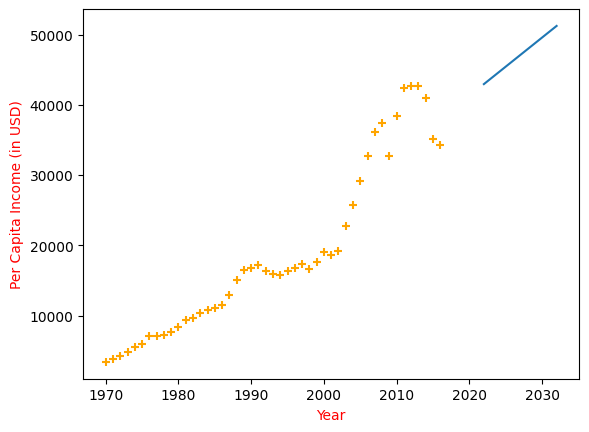

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plotting the scatter plot out of the dataset
plt.scatter(data['year'], data['per capita income (US$)'], color='orange', marker='+')
plt.xlabel("Year", color='red')
plt.ylabel("Per Capita Income (in USD)", color="red")

# Plotting the best fit line
plt.plot(prediction_years, predicted_incomes)

## Extrating the predictions in a CSV

In [57]:
# Way(1):
# predictions = pd.DataFrame({"Year": prediction_years, "Per Capita Income (in USD)": predicted_incomes})

# Way(2):
# For the Way(2), we must use the flatten() function to convert the 2D NumPy array into a 1D array
predictions = pd.DataFrame({"Year": prediction_years.flatten(), "Per Capita Income (in USD)": predicted_incomes})
predictions.to_csv("final_result.csv", index=False)

### Note:
>1. The `reshape(-1, 1)` reshapes the array. By using `-1` for the number of rows and `1` for the number of columns, we are telling NumPy to reshape the array such that it has only one column, and the number of rows is determined automatically based on the size of the array.
>2. The `flatten()` function is used to convert the 2-D array into a 1-D array.